No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


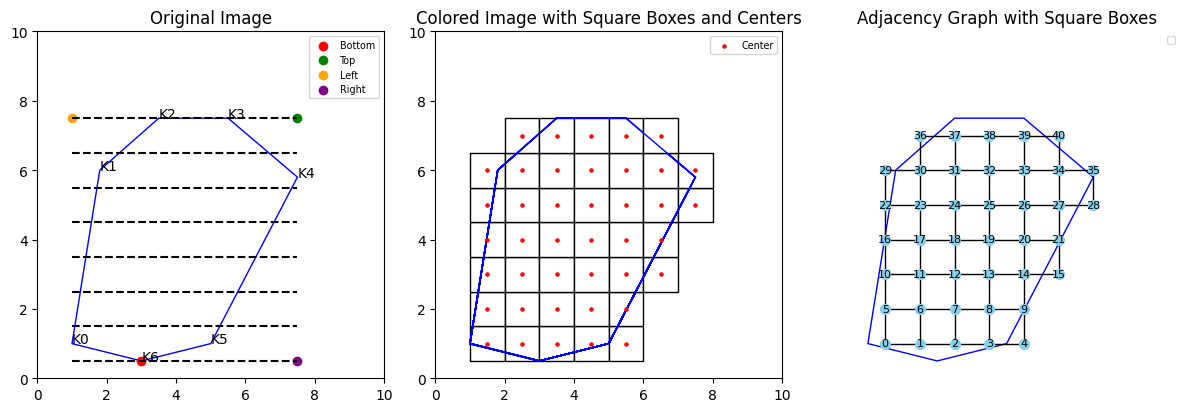

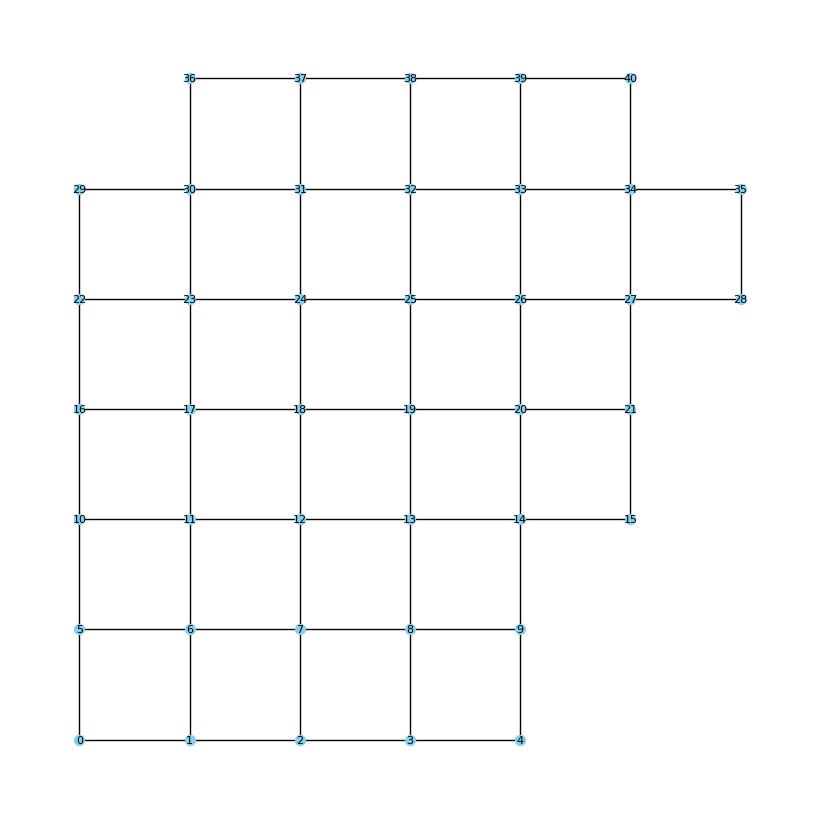

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import networkx as nx

def find_bottom_edge(vertices):
    bottom_edge_index = np.argmin(vertices[:, 1])
    return bottom_edge_index

def calculate_extreme_coordinates(vertices):
    bottom_x = np.min(vertices[:, 0])
    top_x = np.max(vertices[:, 0])
    bottom_y = np.min(vertices[:, 1])
    top_y = np.max(vertices[:, 1])

    bottom_coordinates = [bottom_x, bottom_y]
    top_coordinates = [top_x, top_y]
    left_coordinates = [bottom_x, top_y]
    right_coordinates = [top_x, bottom_y]

    return top_coordinates, left_coordinates, right_coordinates

def calculate_layers_coordinates(bottom_coordinates, top_coordinates, alpha):
    num_layers = int(np.ceil((top_coordinates[1] - bottom_coordinates[1]) / alpha))
    layer_coordinates = [bottom_coordinates[1] + i * alpha for i in range(num_layers + 1)]

    return layer_coordinates


def plot_polygon_with_layers(vertices, bottom_coordinates, top_coordinates, left_coordinates, right_coordinates, layer_coordinates, alpha):
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))

    # Original Image
    polygon = plt.Polygon(vertices, closed=True, edgecolor='blue', facecolor='white')
    axs[0].add_patch(polygon)

    for i, (x, y) in enumerate(vertices):
        axs[0].text(x, y, f'K{i}')

    axs[0].scatter(*bottom_coordinates, color='red', label='Bottom')
    axs[0].scatter(*top_coordinates, color='green', label='Top')
    axs[0].scatter(*left_coordinates, color='orange', label='Left')
    axs[0].scatter(*right_coordinates, color='purple', label='Right')

    for y in layer_coordinates:
        axs[0].hlines(y, left_coordinates[0], right_coordinates[0], colors='black', linestyles='dashed')

    axs[0].set_xlim(0, 10)
    axs[0].set_ylim(0, 10)
    axs[0].set_aspect('equal')
    axs[0].legend(fontsize='x-small')
    axs[0].set_title('Original Image')

    # Colored Image with Square Boxes and Centers
    path = Path(vertices)
    center_points = []

    for y in layer_coordinates[:-1]:
        for x in np.arange(left_coordinates[0], right_coordinates[0], alpha):
            box_boundary = np.array([[x, y], [x + alpha, y], [x + alpha, y + alpha], [x, y + alpha], [x, y]])
            if np.any(path.contains_points(box_boundary)):
                box_edges = np.array([[x, y], [x + alpha, y], [x + alpha, y + alpha], [x, y + alpha], [x, y]])
                square = plt.Rectangle((x, y), alpha, alpha, edgecolor='black', facecolor='white')
                axs[1].add_patch(square)

                # Find and store the center point
                center_x = x + alpha / 2
                center_y = y + alpha / 2
                center_points.append((center_x, center_y))

                # Plot the original polygon boundary on the colored image
                colored_polygon = plt.Polygon(vertices, closed=True, edgecolor='blue', facecolor='none')
                axs[1].add_patch(colored_polygon)

    center_points = np.array(center_points)
    axs[1].scatter(center_points[:, 0], center_points[:, 1], color='red', label='Center', s=5)

    axs[1].set_xlim(0, 10)
    axs[1].set_ylim(0, 10)
    axs[1].set_aspect('equal')
    axs[1].legend(fontsize='x-small')
    axs[1].set_title('Colored Image with Square Boxes and Centers')

    # Adjacency graph with Square Boxes
    colored_polygon_copy = colored_polygon.get_fc()  # Get the face color of the polygon
    axs[2].add_patch(plt.Polygon(vertices, closed=True, edgecolor='blue', facecolor=colored_polygon_copy))
    layout = {i: (x, y) for i, (x, y) in enumerate(center_points)}
    adjacency_graph = create_adjacency_graph(center_points, alpha)

    nx.draw(adjacency_graph, layout, with_labels=True, node_size=50, node_color='skyblue', font_size=8, ax=axs[2])
    axs[2].set_xlim(0, 10)
    axs[2].set_ylim(0, 10)
    axs[2].set_aspect('equal')
    axs[2].legend(fontsize='x-small')
    axs[2].set_title('Adjacency Graph with Square Boxes')

    plt.tight_layout()
    plt.savefig('plot3.png', dpi=700)
    plt.show()

    return center_points


def create_adjacency_graph(center_points, alpha):
    G = nx.Graph()

    # Add nodes
    for i, (x, y) in enumerate(center_points):
        G.add_node(i, pos=(x, y))

    # Add edges between adjacent center points
    for i in range(len(center_points)):
        for j in range(i+1, len(center_points)):
            dist = np.sqrt((center_points[i][0] - center_points[j][0])**2 + (center_points[i][1] - center_points[j][1])**2)
            if dist <= alpha:
                G.add_edge(i, j)

    return G

vertices = np.array([[1, 1], [1.8, 6], [3.5, 7.5], [5.5, 7.5], [7.5, 5.8], [5, 1], [3, 0.5]])

# Camera footprint alpha
alpha = 1

# Find the bottom edge of the polygon
bottom_edge_index = find_bottom_edge(vertices)

# Calculate extreme coordinates
bottom_coordinates = vertices[bottom_edge_index]
top_coordinates, left_coordinates, right_coordinates = calculate_extreme_coordinates(vertices)

# Calculate layer coordinates
layer_coordinates = calculate_layers_coordinates(bottom_coordinates, top_coordinates, alpha)

# Plot the original and colored images side by side
center_points = plot_polygon_with_layers(vertices, bottom_coordinates, top_coordinates, left_coordinates, right_coordinates, layer_coordinates, alpha)
# Create the adjacency graph with diagonals
adjacency_graph = create_adjacency_graph(center_points, alpha)

# Draw the adjacency graph
plt.figure(figsize=(8, 8))

# Adjust the layout of the graph to align with the original polygon
layout = {i: (x, y) for i, (x, y) in enumerate(center_points)}


nx.draw(adjacency_graph, layout, with_labels=True, node_size=50, node_color='skyblue', font_size=8)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


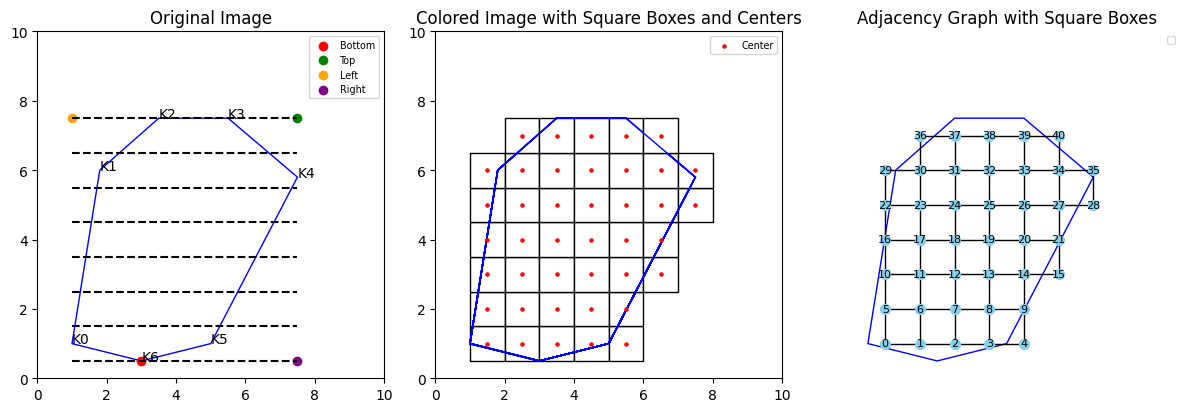

Best Solution: [0, 5, 10, 16, 22, 29, 30, 36, 30, 23, 17, 11, 6, 1, 2, 7, 12, 18, 24, 31, 37, 38, 32, 25, 19, 13, 8, 3, 4, 9, 14, 20, 26, 33, 39, 40, 34, 27, 28, 35, 28, 27, 21, 15, 14, 9, 4]
min length cost: 46


In [19]:
def solve_tsp(adjacency_graph):
    tsp_path = nx.approximation.traveling_salesman_problem(adjacency_graph, cycle=False)
    return tsp_path

def simulated_annealing_min_length_covering_with_paths_and_charge(adjacency_graph, initial_solution=None, num_iterations=5000, temperature=10.0, cooling_rate=0.99):
    if initial_solution is None:
        initial_solution = list(adjacency_graph.nodes)

    current_solution = initial_solution
    best_solution = current_solution

    current_path_length = calculate_path_length_with_weights(adjacency_graph, current_solution)
    best_path_length = current_path_length

    current_charge_cost = calculate_charge_cost(current_solution, adjacency_graph)  # Pass the adjacency graph
    best_charge_cost = current_charge_cost

    all_paths = [current_solution.copy()]

    for _ in range(num_iterations):
        # Generate a neighboring solution using problem-specific heuristics
        new_solution = generate_neighbor_solution(current_solution, adjacency_graph)

        # Calculate the length of the new solution
        new_path_length = calculate_path_length_with_weights(adjacency_graph, new_solution)

        # Calculate the charge cost for the new solution
        new_charge_cost = calculate_charge_cost(new_solution, adjacency_graph)  # Pass the adjacency graph

        # Calculate the change in length and charge cost
        delta_path_length = new_path_length - current_path_length
        delta_charge_cost = new_charge_cost - current_charge_cost

        # Accept the new solution with probability based on the Metropolis criterion
        if delta_path_length < 0 and delta_charge_cost < 0:  # Both path length and charge cost are reduced
            current_solution = new_solution
            current_path_length = new_path_length
            current_charge_cost = new_charge_cost
        elif np.random.rand() < np.exp(-(delta_path_length + delta_charge_cost) / temperature):
            current_solution = new_solution
            current_path_length = new_path_length
            current_charge_cost = new_charge_cost

        # Update the best solution if the current solution is better
        if current_path_length < best_path_length and current_charge_cost < best_charge_cost:
            best_solution = current_solution
            best_path_length = current_path_length
            best_charge_cost = current_charge_cost

        # Store the current solution in the list of all paths
        all_paths.append(current_solution.copy())

        # Update the temperature according to the cooling schedule
        temperature *= cooling_rate

    return best_solution, best_path_length, best_charge_cost, all_paths


def generate_neighbor_solution(solution, adjacency_graph):
    index = np.random.randint(0, len(solution) - 1)
    neighbor_indices = [index, index + 1]
    np.random.shuffle(neighbor_indices)
    new_solution = solution[:neighbor_indices[0]] + [solution[neighbor_indices[1]]] + [solution[neighbor_indices[0]]] + solution[neighbor_indices[1] + 1:]
    return new_solution

def calculate_path_length_with_weights(graph, path):
    total_length = 0
    for i in range(len(path) - 1):
        node1 = path[i]
        node2 = path[i + 1]
        try:
            total_length += graph[node1][node2]['weight']
        except KeyError:
            # Set default weight if none defined
            total_length += 1
    return total_length

def calculate_charge_cost(solution, adjacency_graph):
    # Calculate the charge cost based on the specific constraints of the problem
    # This could involve computing the total distance traveled, obstacles encountered, etc.
    # For demonstration purposes, let's assume a simple linear relationship between path length and charge cost
    charge_cost = calculate_path_length_with_weights(adjacency_graph, solution) * charge_rate
    return charge_cost


# Define vertices
vertices = np.array([[1, 1], [1.8, 6], [3.5, 7.5], [5.5, 7.5], [7.5, 5.8], [5, 1], [3, 0.5]])

# Camera footprint alpha
alpha = 1

# Define charge rate
charge_rate = .1  # Modify this according to your problem's specifics

# Find the bottom edge of the polygon
bottom_edge_index = find_bottom_edge(vertices)

# Calculate extreme coordinates
bottom_coordinates = vertices[bottom_edge_index]
top_coordinates, left_coordinates, right_coordinates = calculate_extreme_coordinates(vertices)

# Calculate layer coordinates
layer_coordinates = calculate_layers_coordinates(bottom_coordinates, top_coordinates, alpha)

# Plot the original and colored images side by side
center_points = plot_polygon_with_layers(vertices, bottom_coordinates, top_coordinates, left_coordinates, right_coordinates, layer_coordinates, alpha)
center_points
# Create the adjacency graph with diagonals
# Example usage
adjacency_graph_with_weights = create_adjacency_graph(center_points, alpha)

tsp_path = solve_tsp(adjacency_graph_with_weights)

# Call the Simulated Annealing function with adjusted parameters and the TSP solution as the initial solution
best_solution, min_path_length, min_charge_cost, all_paths = simulated_annealing_min_length_covering_with_paths_and_charge(adjacency_graph_with_weights, initial_solution=tsp_path, num_iterations=10000, temperature=10.0, cooling_rate=0.995)

print("Best Solution:", best_solution)
print("min length cost:", min_path_length)


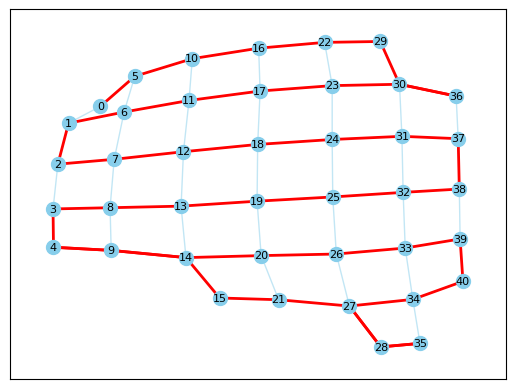

In [15]:
sa_path_edges = [(best_solution[i], best_solution[i+1]) for i in range(len(best_solution) - 1)]

# Visualize the graph with the traversal path highlighted
pos_sa = nx.spring_layout(adjacency_graph_with_weights)

# Draw nodes
nx.draw_networkx_nodes(adjacency_graph_with_weights, pos_sa, node_size=100, node_color='skyblue')

# Draw edges with specified color and style
nx.draw_networkx_edges(adjacency_graph_with_weights, pos_sa, edge_color='skyblue', width=1, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(adjacency_graph_with_weights, pos_sa, font_size=8, font_color='black')

# Draw the traversal path edges with red color and width 2
nx.draw_networkx_edges(adjacency_graph_with_weights, pos_sa, edgelist=sa_path_edges, edge_color='red', width=2)


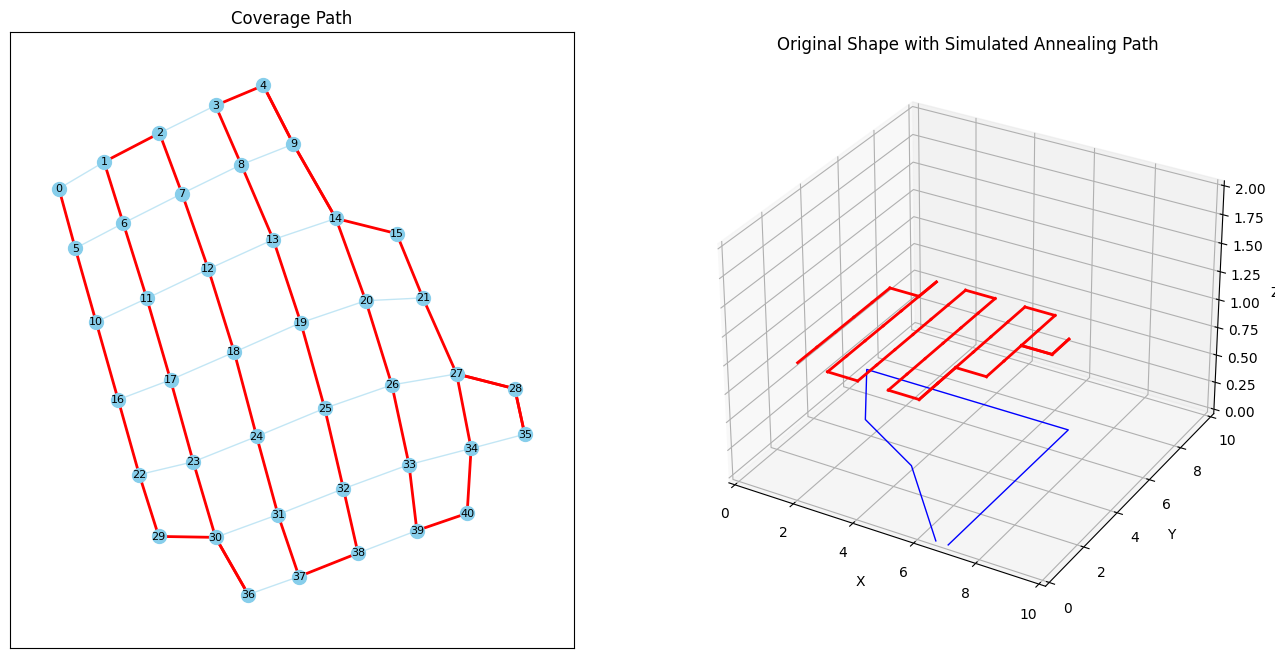

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx

# Assuming you have defined your data and plots as shown in your code
vertices = np.array([[6.6,0],[4,3],[1.5,4.5],[0,7],[7,7],[7,0]])

# Define subplot layout
fig = plt.figure(figsize=(16, 8))

# Plot the coverage path in the first subplot
ax1 = fig.add_subplot(121)
pos_sa = nx.spring_layout(adjacency_graph_with_weights)
nx.draw_networkx_nodes(adjacency_graph_with_weights, pos_sa, node_size=100, node_color='skyblue', ax=ax1)
nx.draw_networkx_edges(adjacency_graph_with_weights, pos_sa, edge_color='skyblue', width=1, alpha=0.5, ax=ax1)
nx.draw_networkx_labels(adjacency_graph_with_weights, pos_sa, font_size=8, font_color='black', ax=ax1)
nx.draw_networkx_edges(adjacency_graph_with_weights, pos_sa, edgelist=sa_path_edges, edge_color='red', width=2, ax=ax1)
ax1.set_title('Coverage Path')

# Plot the 3D path in the second subplot
ax2 = fig.add_subplot(122, projection='3d')
height = 1
polygon = ax2.plot(vertices[:, 0], vertices[:, 1], np.zeros_like(vertices[:, 0]), color='blue', linewidth=1)
for edge in sa_path_edges:
    start = center_points[edge[0]]
    end = center_points[edge[1]]
    ax2.plot([start[0], end[0]], [start[1], end[1]], [height, height], color='red', linewidth=2)
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.set_zlim(0, 2)  # Now set_zlim should work as ax2 is a 3D subplot
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Original Shape with Simulated Annealing Path')

# Save or display the plot
plt.savefig('combined_paths.png', dpi=700)
plt.show()


In [20]:
def simulated_annealing_grid_search_with_charge(adjacency_graph, temperature_range, cooling_rate_range, iterations_range, num_runs=3):
    best_solution = None
    best_cost = float('inf')
    best_parameters = None

    for temp in temperature_range:
        for cooling_rate in cooling_rate_range:
            for iterations in iterations_range:
                avg_cost = 0
                for _ in range(num_runs):
                    # Run simulated annealing with current parameter values
                    solution, path_length, charge_cost, _ = simulated_annealing_min_length_covering_with_paths_and_charge(adjacency_graph, num_iterations=iterations, temperature=temp, cooling_rate=cooling_rate)
                    total_cost = path_length + charge_cost  # Total cost is the sum of path length and charge cost
                    avg_cost += total_cost
                avg_cost /= num_runs

                # Update best solution if current parameters result in better solution
                if avg_cost < best_cost:
                    best_solution = solution
                    best_cost = avg_cost
                    best_parameters = {'temperature': temp, 'cooling_rate': cooling_rate, 'iterations': iterations}

    return best_solution, best_cost, best_parameters

# Define ranges for temperature, cooling rate, and iterations
temperature_range = [1.0, 5.0, 10.0]
cooling_rate_range = [0.95, 0.99, 0.995]
iterations_range = [5000, 10000, 15000]

# Perform grid search
best_solution, best_cost, best_parameters = simulated_annealing_grid_search_with_charge(adjacency_graph_with_weights, temperature_range, cooling_rate_range, iterations_range)

print("Best Solution:", best_solution)
print("Best Cost:", best_cost)
print("Best Parameters:", best_parameters)



Best Solution: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Best Cost: 44.0
Best Parameters: {'temperature': 1.0, 'cooling_rate': 0.95, 'iterations': 5000}


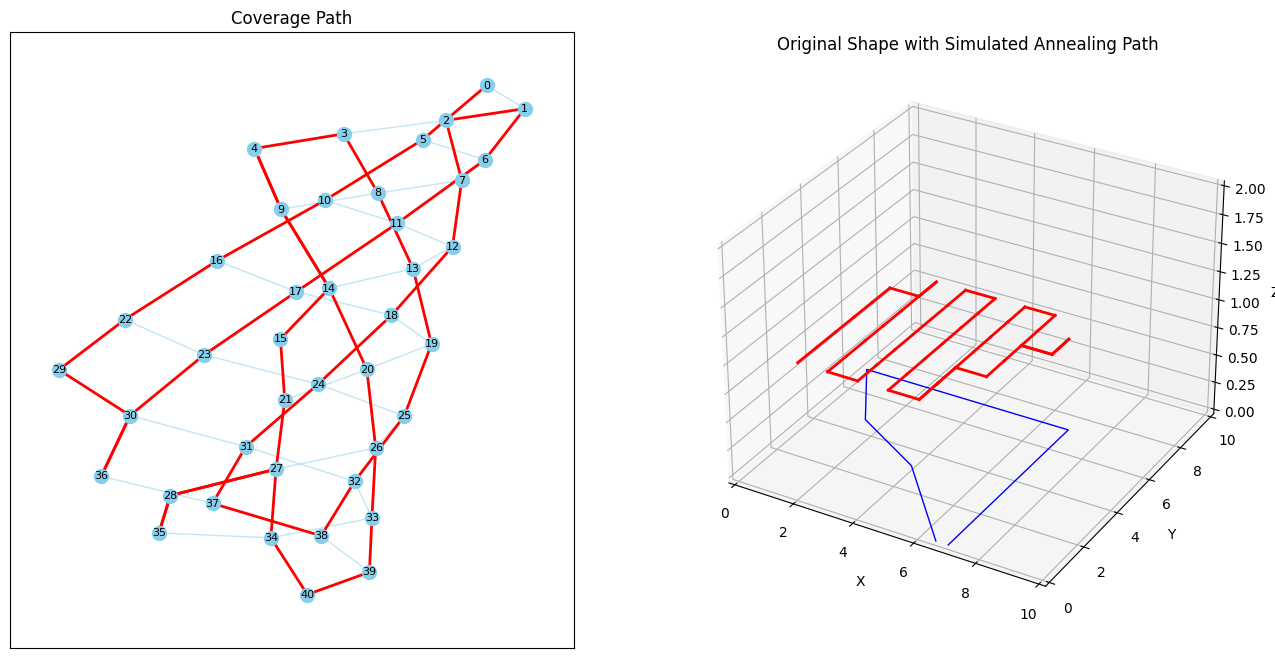

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx

# Assuming you have defined your data and plots as shown in your code
vertices = np.array([[6.6,0],[4,3],[1.5,4.5],[0,7],[7,7],[7,0]])

# Define subplot layout
fig = plt.figure(figsize=(16, 8))

# Plot the coverage path in the first subplot
ax1 = fig.add_subplot(121)
pos_sa = nx.spring_layout(adjacency_graph_with_weights)
nx.draw_networkx_nodes(adjacency_graph_with_weights, pos_sa, node_size=100, node_color='skyblue', ax=ax1)
nx.draw_networkx_edges(adjacency_graph_with_weights, pos_sa, edge_color='skyblue', width=1, alpha=0.5, ax=ax1)
nx.draw_networkx_labels(adjacency_graph_with_weights, pos_sa, font_size=8, font_color='black', ax=ax1)
nx.draw_networkx_edges(adjacency_graph_with_weights, pos_sa, edgelist=sa_path_edges, edge_color='red', width=2, ax=ax1)
ax1.set_title('Coverage Path')

# Plot the 3D path in the second subplot
ax2 = fig.add_subplot(122, projection='3d')
height = 1
polygon = ax2.plot(vertices[:, 0], vertices[:, 1], np.zeros_like(vertices[:, 0]), color='blue', linewidth=1)
for edge in sa_path_edges:
    start = center_points[edge[0]]
    end = center_points[edge[1]]
    ax2.plot([start[0], end[0]], [start[1], end[1]], [height, height], color='red', linewidth=2)
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.set_zlim(0, 2)  # Now set_zlim should work as ax2 is a 3D subplot
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Original Shape with Simulated Annealing Path')

# Save or display the plot
plt.savefig('combined_paths.png', dpi=700)
plt.show()
